In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import Function as f

In [2]:
max_iteration = 10000
weight_decay = 1e-5
NUM_EMPLOYEES = 5200
NUM_TRAIN = 5000
NUM_VAL = 200
Epsilons = [10, 10]
NUM_FEATURES = 5

In [3]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_EMPLOYEES, NUM_FEATURES, Epsilons, bias = True)

Discard the top 5% longevity training samples

In [4]:
five_percent = int(len(survival_times) * 0.05)
five_percent_indices = np.argsort(survival_times)[(-1) * five_percent:]
threshold_age = survival_times[five_percent_indices[0]]
survival_times[five_percent_indices] = threshold_age

for i in five_percent_indices:
    while(True):
        _lambda = 0
        Epsilon_1, Epsilon_2 = Epsilons
        while (True):
            temp_Xi = np.random.multivariate_normal(np.zeros(NUM_FEATURES), np.eye(NUM_FEATURES))
            _lambda = Epsilon_1 * np.sum(X[i, :] ** 2) + Epsilon_2 * np.sum(X[i, :])
            if _lambda > 0: 
                X[i] = np.concatenate((temp_Xi, np.array([1])), axis=0)
                break
            
        
        age = np.ceil(np.random.exponential(_lambda, size=1))
        if age <= threshold_age:
            survival_times[i] = age
            break

NUM_TASKS = int(np.max(survival_times))
Y = np.ones((NUM_EMPLOYEES, NUM_TASKS))
# the lifetime matrix of all employees, if one employee leave at the time interval k, then from Y[i,k](inlcude)  all entries are -1
for i in range(NUM_EMPLOYEES):
    Y[i, int(survival_times[i]):] = -1

In [ ]:
NUM_TASKS = Y.shape[1]
x_axis = np.arange(NUM_TASKS)+1
y_train_gt_axis = np.zeros(NUM_TASKS)
for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis)

In [5]:
X_train = X[:NUM_TRAIN]
X_val = X[NUM_TRAIN:]
Y_train = Y[:NUM_TRAIN]
Y_val = Y[NUM_TRAIN:]

In [6]:
# intialization
NUM_TASKS = int(max(survival_times))
loss_list = []
W = np.zeros((NUM_FEATURES + 1, NUM_TASKS))
W[-1] += 1
dL1_W = np.zeros(W.shape)

In [7]:
# start the loop
for t in range(1, max_iteration + 1):

    # W, loss_list = f.Non_Kernel_Pegasos(10, X_train, W, Y_train, loss_list, t, weight_decay)
    W = f.Split_Non_Kernel_Pegasos(10, X_train, W, Y_train, loss_list, t, weight_decay)
    if t % 100 == 0:
        Y_pred_tr = X_train.dot(W)
        Y_pred_val = X_val.dot(W)
        acc_tr = np.sum(Y_pred_tr * Y_train > 0) / (Y_pred_tr.size)
        acc_val = np.sum(Y_pred_val * Y_val > 0) / (Y_pred_val.size)
        print(acc_tr, acc_val)
        predict_age_tr = f.Ages(Y_pred_tr)
        predict_age_val = f.Ages(Y_pred_val)
        predict_age = predict_age_tr + predict_age_val
        
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
        
        print("the c-index for val is:", C_index_val)
        # print('Iteration {}:{:.2f}, loss = {},'.format(t, acc, loss_list[-1]))
        # print('Iteration {}:{:.2f}, loss = {}, #violations = {}'.format(iter_times, acc, loss, num_violates))

0.7800697435897436 0.7884615384615384
7786 19538.0
the c-index for val is: 0.39850547650731905
0.7933620512820513 0.8112564102564103
8871 19538.0
the c-index for val is: 0.4540382843689221
0.8083661538461538 0.8196923076923077
7804 19538.0
the c-index for val is: 0.39942675811239636
0.7416133333333333 0.7411282051282051
9128 19538.0
the c-index for val is: 0.46719213839697
0.8146553846153847 0.8297179487179487
9129 19538.0
the c-index for val is: 0.46724332070836316
0.7990882051282051 0.8160512820512821
9635 19538.0
the c-index for val is: 0.49314157027331357
0.8115210256410257 0.8250512820512821
8386 19538.0
the c-index for val is: 0.42921486334322856
0.8150871794871795 0.8316410256410256
9763 19538.0
the c-index for val is: 0.4996929061316409
0.7983364102564102 0.8107692307692308
8791 19538.0
the c-index for val is: 0.4499436994574675
0.7973282051282051 0.8098974358974359
7394 19538.0
the c-index for val is: 0.3784420104411915
0.7654841025641026 0.7586153846153846
9183 19538.0
the c-

0.7827651282051282 0.7877948717948718
8386 19538.0
the c-index for val is: 0.42921486334322856
0.7740215384615384 0.7761025641025641
8330 19538.0
the c-index for val is: 0.4263486539052104
0.81684 0.8279230769230769
9263 19538.0
the c-index for val is: 0.47410175043504965
0.7725794871794872 0.7755897435897436
9300 19538.0
the c-index for val is: 0.4759954959565974
0.8189805128205129 0.8309230769230769
9353 19538.0
the c-index for val is: 0.4787081584604361
0.7691230769230769 0.7773846153846153
8676 19538.0
the c-index for val is: 0.4440577336472515
0.7823025641025642 0.7841282051282051
8211 19538.0
the c-index for val is: 0.42025795884942163
0.7792461538461538 0.7808205128205128
9731 19538.0
the c-index for val is: 0.4980550721670591
0.7987364102564103 0.7995641025641026
10081 19538.0
the c-index for val is: 0.515968881154673
0.7976789743589744 0.8024871794871795
9271 19538.0
the c-index for val is: 0.4745112089261951
0.7862174358974359 0.7960769230769231
9886 19538.0
the c-index for v

In [8]:
Y_pred = X.dot(W)
predict_age = f.Ages(Y_pred)
# print(predict_ages)
c_index = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age[NUM_TRAIN:])
print(c_index)

8621 19538.0
0.44124270652062647


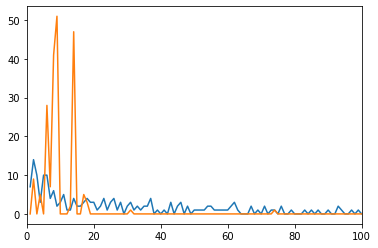

In [12]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
# plt.boxplot(y_train_gt_axis)


# print(y_train_gt_axis,y_train_predict_axis)
# plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
plt.xlim(0,100)
plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
# plt.plot(x_axis, y_val_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)